## Observations and Insights 

In [13]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path="data/Mouse_metadata.csv"
study_results_path="data/Study_results.csv"
#Read the mouse data and the study results
mouse_metadata=pd.read_csv (mouse_metadata_path)
study_results=pd.read_csv (study_results_path)
#Combine the data into a single dataset
merged_data=pd.merge (mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
merged_data.head (10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [23]:
#Checking the number of mice.
unique_mice=merged_data ["Mouse ID"] .unique()

count_of_mice=len (unique_mice)

count_of_mice

249

In [38]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes=merged_data. duplicated (subset =["Mouse ID","Timepoint"],keep=False)
merged_data ['dupes']=dupes
merged_data.loc[merged_data.dupes==True]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,dupes
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [51]:
#Optional: Get all the data for the duplicate mouse ID. 
bad=merged_data.loc [merged_data ["Mouse ID"]=="g989"]
bad


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,dupes
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [57]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=merged_data [merged_data["Mouse ID"]!='g989']
clean_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,dupes
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
5,k403,Ramicane,Male,21,16,25,33.464577,1,False
6,k403,Ramicane,Male,21,16,30,31.099498,1,False
7,k403,Ramicane,Male,21,16,35,26.546993,1,False
8,k403,Ramicane,Male,21,16,40,24.365505,1,False
9,k403,Ramicane,Male,21,16,45,22.050126,1,False


In [59]:
#Checking the number of mice in the clean DataFrame.
clean_data ["Mouse ID"] .nunique ()

248

## Summary Statistics

In [96]:
#Use Clean Data
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#mean, median, variance, standard deviation, and SEM of the tumor volume. 
rvmean=clean_data.groupby ("Drug Regimen") ["Tumor Volume (mm3)"] .mean()
rvmedian=clean_data.groupby ("Drug Regimen") ["Tumor Volume (mm3)"] .median()
rvvar=clean_data.groupby ("Drug Regimen") ["Tumor Volume (mm3)"] .var()
rvstd=clean_data.groupby ("Drug Regimen") ["Tumor Volume (mm3)"] .std()
rvsem=clean_data.groupby ("Drug Regimen") ["Tumor Volume (mm3)"] .sem()
# Assemble the resulting series into a single summary dataframe.
rv_df=pd.DataFrame ({'Mean' :rvmean, 
                   'Median' :rvmedian, 
                    'Variance' :rvvar, 
                    'Std. Dev' :rvstd, 
                     'SEM' :rvsem})
rv_df

,Mean,Median,Variance,Std. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


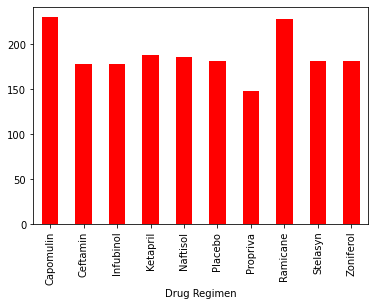

In [98]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Using the aggregation method, produce the same summary statistics in a single line
x =clean_data.groupby ("Drug Regimen") .size()

x.plot (kind='bar', color='r')

plt.show ()

## Bar and Pie Charts

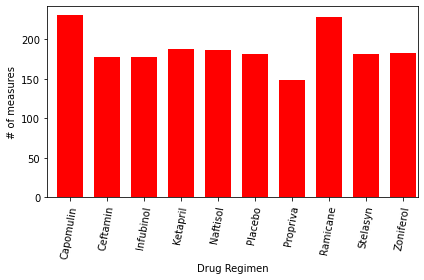

In [94]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
source=clean_data ["Drug Regimen"].value_counts().sort_index()

x_axis=np.arange (len(source))

x_ticks=list (source.keys())

y_values=source.tolist ()
 
plt.bar(x_axis,y_values,width= .7,color='r',align='center')

tick_locations= [value for value in x_axis]

plt.xticks(tick_locations,x_ticks,rotation = 80)

plt.ylabel ("# of measures")

plt.xlabel ('Drug Regimen')

plt.xlim (-0.6, len(x_axis)-0.6)

plt.tight_layout ()

plt.show ()


<AxesSubplot:title={'center':'Genders of the Mice Subjects'}, ylabel='Sex'>

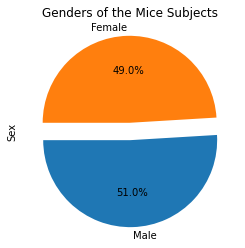

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
source_gender=clean_data["Sex"].value_counts(1)
explode=[0.1, 0.1]
color =["red","blue"]
source_gender. plot (kind='pie',title = "Genders of the Mice Subjects",startangle=180,explode=explode,autopct="%1.1f%%",shadow=False)

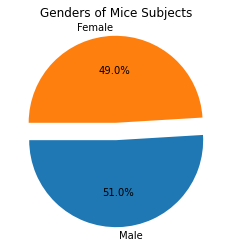

In [128]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = source_gender.index
gender_counts =source_gender.values
explode =(0.1, 0.1)
color =["red","blue"]
plt.pie(gender_counts, explode=explode,labels=genders,
        autopct="%1.1f%%", shadow=False, startangle=180)
plt.title("Genders of Mice Subjects")
plt.show()


## Quartiles, Outliers and Boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
lt_group = clean_data.groupby(["Mouse ID", "Drug Regimen"])
mouse_frame = clean_data.set_index("Mouse ID")
lt_max = lt_group["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
lt_max = lt_max.reset_index()
lt_max_df = pd.DataFrame(lt_max)
merged = lt_max_df.merge(mouse_frame,how='left', left_on='Mouse ID', right_on='Mouse ID')
merged_filtered = merged.loc[merged["Timepoint_x"]==merged["Timepoint_y"]]
final_tumor = merged_filtered[['Timepoint_x', 'Drug Regimen_x', 'Weight (g)', 'Tumor Volume (mm3)']].copy()
final_tumor

,Timepoint_x,Drug Regimen_x,Weight (g),Tumor Volume (mm3)
9,45,Infubinol,23,67.973419
19,45,Infubinol,25,65.525743
29,45,Placebo,29,70.717621
39,45,Ceftamin,28,62.999356
46,30,Stelasyn,29,63.440686
...,...,...,...,...
1839,10,Propriva,26,48.710661
1849,45,Ramicane,16,30.638696
1859,45,Infubinol,25,62.754451
1869,45,Naftisol,29,65.741070


In [169]:
#Select only the promising treatments from final_tumor df
rec_drugs = final_tumor.loc[(final_tumor["Drug Regimen_x"]=="Infubinol") | (final_tumor["Drug Regimen_x"]=="Capomulin") | (final_tumor["Drug Regimen_x"]=="Ramicane") | (final_tumor["Drug Regimen_x"]=="Ceftamin")]

#Organize tumor volume data from final_tumor df by drug
group_rec_drugs = rec_drugs.groupby("Drug Regimen_x")
infu = group_rec_drugs.get_group("Infubinol")["Tumor Volume (mm3)"]
ceft = group_rec_drugs.get_group("Ceftamin")["Tumor Volume (mm3)"]
rami = group_rec_drugs.get_group("Ramicane")["Tumor Volume (mm3)"]
capo = group_rec_drugs.get_group("Capomulin")["Tumor Volume (mm3)"]

#Put each group in a list
rec_drugs_list = [infu, ceft, rami, capo]

In [170]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

# Put treatments into a list for for loop (and later for plot labels)
rec_drugs = ["Infubinol", "Ceftamin", "Ramicane", "Capomulin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

i=0
for drugx in rec_drugs_list:
    thisdrug = rec_drugs[i]
    i=i+1
    quartiles = drugx.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    medianq = quartiles[0.5]
    iqr = upperq-lowerq   
    print(f"The lower quartile of tumor volumes in {thisdrug} is: {lowerq}")
    print(f"The upper quartile of tumor volumes in {thisdrug} is: {upperq}")
    print(f"The interquartile range of tumor volumes in {thisdrug} is: {iqr}")
    print(f"The median of tumor volumes is: {medianq} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    tumor_data.append([thisdrug, lowerq, upperq, iqr, lower_bound, upper_bound])

The lower quartile of tumor volumes in Infubinol is: 54.04860769
The upper quartile of tumor volumes in Infubinol is: 65.52574285
The interquartile range of tumor volumes in Infubinol is: 11.477135160000003
The median of tumor volumes is: 60.16518046 
The lower quartile of tumor volumes in Ceftamin is: 48.72207785
The upper quartile of tumor volumes in Ceftamin is: 64.29983003
The interquartile range of tumor volumes in Ceftamin is: 15.577752179999997
The median of tumor volumes is: 59.85195552 
The lower quartile of tumor volumes in Ramicane is: 31.56046955
The upper quartile of tumor volumes in Ramicane is: 40.65900627
The interquartile range of tumor volumes in Ramicane is: 9.098536719999998
The median of tumor volumes is: 36.56165229 
The lower quartile of tumor volumes in Capomulin is: 32.37735684
The upper quartile of tumor volumes in Capomulin is: 40.1592203
The interquartile range of tumor volumes in Capomulin is: 7.781863460000004
The median of tumor volumes is: 38.12516439999

In [198]:
#Determine if there are any potential outliers across all four treatment regimens.

# Determine outliers using upper and lower bounds
tumor_df = pd.DataFrame(tumor_data)
tumor_df.set_index(0)
loutliers=[]
uoutliers=[]
i=0
#print(rec_drugs_list[2]["Tumor Volume (mm3)"])
for drugx in rec_drugs_list:
thisdrug=rec_drugs[i]
curr_data=drugx
bound_data=tumor_data[i]
i=i+1
print(thisdrug, bound_data[4], bound_data[5])
    
#Determine outliers and append name of drug and outlier value to list
    for j in curr_data:
        if bound_data[4]> j:
            loutliers.append([thisdrug, j])
        elif bound_data[5]<j:
            uoutliers.append([thisdrug, j])

#Print results re: outliers            
if len(loutliers) > 0:print (f"Lower Outliers: {loutliers}")
else:print ("No lower outliers")
if len(uoutliers) > 0: print (f"Upper Outliers: {uoutliers}")
else:print ("No upper outliers")

IndentationError: expected an indented block (<ipython-input-198-650273dabae6>, line 11)

<ipython-input-199-4d0c45ac7c85>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels (['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'])


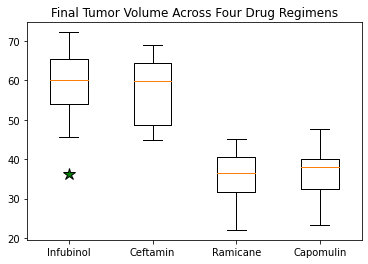

In [199]:
#Generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
infu_list=infu.tolist ()

ceft_list=ceft.tolist ()

rami_list=rami.tolist ()

capo_list=capo.tolist ()

data_box=[infu_list,ceft_list,rami_list,capo_list]
fig1, ax1=plt.subplots ()

#Highlight outliers by changing color and style
flierprops=dict(marker='*',markerfacecolor='green',markersize=12,
                  linestyle='none')

ax1.set_title ('Final Tumor Volume Across Four Drug Regimens')

ax1.set_xticklabels (['Infubinol', 'Ceftamin', 'Ramicane', 'Capomulin'])
#Use list 'data_box' to put all plots in same figure
ax1.boxplot (data_box, flierprops=flierprops)
plt.show()


## Line and Scatter Plots

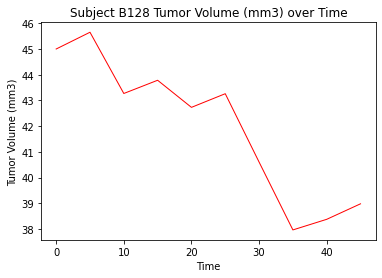

In [194]:
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.


# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
data_bydrug = clean_data.groupby("Drug Regimen")

#(make DFs for each drug,grab max Tumor Volume for each Mouse ID )
capo_df=data_bydrug.get_group ("Capomulin")
capo_time=capo_df.groupby ("Mouse ID")[["Tumor Volume (mm3)","Timepoint"]]
b128_capo_time=capo_time.get_group ('b128')
time=b128_capo_time ["Timepoint"]
vol=b128_capo_time ["Tumor Volume (mm3)"]
plt.title ("Subject B128 Tumor Volume (mm3) over Time")
plt.xlabel ("Time")
plt.ylabel ("Tumor Volume (mm3)")
plt.plot (time, vol, color='r', linewidth=1)
plt.show ()
capo_mouse=capo_df [["Mouse ID","Weight (g)","Timepoint","Tumor Volume (mm3)"]].groupby ("Mouse ID").mean()
capo_weight=capo_mouse ["Weight (g)"]
capo_tumvol=capo_mouse ["Tumor Volume (mm3)"]

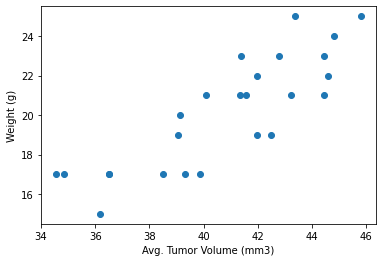

In [189]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter (capo_tumvol,capo_weight)

plt.xlabel ("Avg. Tumor Volume (mm3)")

plt.ylabel ("Weight (g)")

plt.show ()

## Correlation and Regression

Correlation between Weight (g) and Tumor Volume (mm3) is 0.84


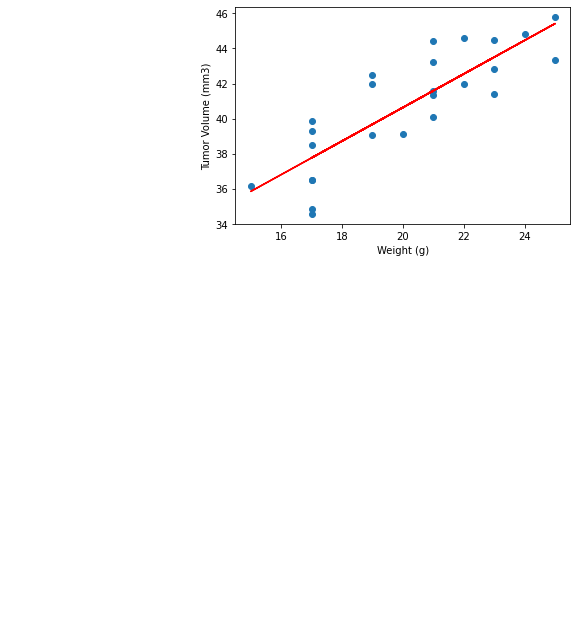

In [188]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


print(f"Correlation between Weight (g) and Tumor Volume (mm3) is {round (st.pearsonr (capo_weight,capo_tumvol) [0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress (capo_weight, capo_tumvol)

regress_values = capo_weight * slope + intercept

line_eq = "y = " + str(round(slope,1)) + "x + " + str (round(intercept,1))

plt.scatter(capo_weight, capo_tumvol)

plt.plot(capo_weight,regress_values,"r-")

plt.annotate(line_eq,(7,11),fontsize=18,color="red")

plt.xlabel('Weight (g)')

plt.ylabel('Tumor Volume (mm3)')

plt.show()